## Degue vs Environmental Analysis.


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Check version
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')
print(f'sklearn version: {sklearn.__version__}')

pandas version: 1.1.3
numpy version: 1.19.2
seaborn version: 0.11.0
sklearn version: 0.23.2


### Input Data from CSV file.

In [3]:
# Read in Data set
df= pd.read_csv('dengue_preprocessing.csv',header= 0,encoding= 'unicode_escape')

In [4]:
df.head()

,year,year_num,province,province_num,day_raindrop,quant_rain,humbidity_perc,temp_max,temp_min,temp_avg,dead,dead_perc,patient
0,2016,1,krabi,1,137,1976.0,81.9,37.5,18.4,27.2,4,0.23,1714
1,2016,1,Bkk,2,113,1907.6,73.6,39.8,19.2,29.2,3,0.05,6291
2,2016,1,Kranjanaburi,3,97,963.2,67.8,42.3,14.8,29.2,5,0.41,1212
3,2016,1,Kalasilp,4,105,1283.6,77.1,41.8,9.9,27.2,0,0.00,1420
4,2016,1,Kampangpech,5,112,967.0,71.3,41.5,14.4,28.4,1,0.15,669


In [5]:
# Tempolary data preparation and just use for build model 

In [6]:
df = df.drop(columns=['province', 'year'])

In [7]:
df.tail(10)

,year_num,province_num,day_raindrop,quant_rain,humbidity_perc,temp_max,temp_min,temp_avg,dead,dead_perc,patient
375,5,68,160,2060.2,82.9,39.5,18.7,29.10,1,0.04,2490
376,5,69,110,1391.2,69.4,40.8,11.1,25.95,0,0.00,2834
377,5,70,116,1954.6,70.6,41.5,14.2,27.85,1,0.14,733
378,5,71,107,1121.0,70.2,43.4,11.4,27.40,0,0.00,743
379,5,72,87,904.4,68.4,36.5,18.0,27.25,0,0.00,997
380,5,73,111,964.5,68.5,40.6,12.8,26.70,0,0.00,409
381,5,74,100,1217.8,69.6,42.5,12.1,27.30,1,0.04,2450
382,5,75,86,1086.1,67.5,43.0,14.0,28.50,1,0.17,575
383,5,76,92,803.8,71.4,42.5,15.4,28.95,0,0.00,621
384,5,77,111,1595.1,68.5,40.6,14.2,27.40,3,0.14,2092


In [8]:
df.describe()

,year_num,province_num,day_raindrop,quant_rain,humbidity_perc,temp_max,temp_min,temp_avg,dead,dead_perc,patient
count,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,3.000000,39.000000,122.929870,1543.319740,74.789351,39.460260,14.781299,27.875455,1.358442,0.090000,1404.485714
std,1.416054,22.255032,30.138271,774.967638,4.380409,2.236733,3.899928,1.024079,2.354370,0.126734,1363.167218
min,1.000000,1.000000,75.000000,513.200000,63.900000,24.000000,0.600000,23.600000,0.000000,0.000000,62.000000
25%,2.000000,20.000000,101.000000,1023.500000,71.400000,37.900000,11.600000,27.300000,0.000000,0.000000,510.000000
50%,3.000000,39.000000,114.000000,1308.700000,74.300000,39.700000,14.800000,27.900000,1.000000,0.040000,938.000000
75%,4.000000,58.000000,141.000000,1794.900000,77.700000,41.200000,18.200000,28.600000,2.000000,0.140000,1821.000000
max,5.000000,77.000000,220.000000,5287.300000,85.000000,43.400000,23.400000,31.300000,19.000000,0.880000,8279.000000


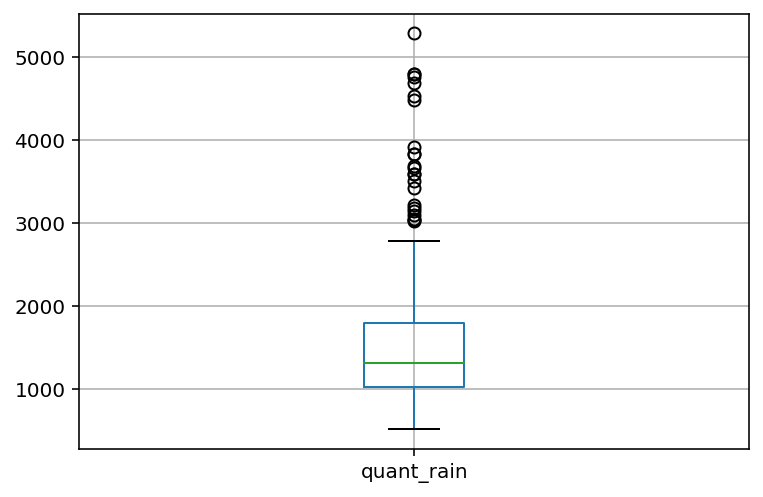

In [9]:
#find outliers
boxplot = df.boxplot(column=['quant_rain'])

In [10]:
# Greater than 50000 replace to mean value.(Did it make score drop)

#df['patient'] = np.where(df['patient'] > 5000, 4950, df['patient'])
#df['quant_rain'] = np.where(df['quant_rain'] > 3000, 2950, df['quant_rain'])

In [11]:
df.columns

Index(['year_num', 'province_num', 'day_raindrop', 'quant_rain',
       'humbidity_perc', 'temp_max', 'temp_min', 'temp_avg', 'dead',
       'dead_perc', 'patient'],
      dtype='object')

In [12]:
# Transformation
df_num  = df[['day_raindrop', 'quant_rain', 'humbidity_perc','temp_max', 'temp_min', 'temp_avg', 'dead', 'dead_perc']]

In [13]:
# Choice of Numerical varialable.

#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [14]:
# Version1: select MinMax

num_column = df_num.dtypes[df_num.dtypes != 'object'].index

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

std_transform_feat = pd.DataFrame(data = df_num)
std_transform_feat[num_column] = scaler.fit_transform(df_num[num_column])

# Show an example of a record with scaling applied
display(std_transform_feat.tail())

,day_raindrop,quant_rain,humbidity_perc,temp_max,temp_min,temp_avg,dead,dead_perc
380,0.248276,0.094531,0.218009,0.855670,0.535088,0.402597,0.000000,0.000000
381,0.172414,0.147588,0.270142,0.953608,0.504386,0.480519,0.052632,0.045455
382,0.075862,0.120002,0.170616,0.979381,0.587719,0.636364,0.052632,0.193182
383,0.117241,0.060870,0.355450,0.953608,0.649123,0.694805,0.000000,0.000000
384,0.248276,0.226619,0.218009,0.855670,0.596491,0.493506,0.157895,0.159091


In [15]:
## log transform to target variable impove RMSE value.(optional)

#df['patient'] = np.log(df['patient'])

In [16]:
df_cat = df[['year_num', 'province_num']]
y_tar = df[['patient']]

In [17]:
## Concat all numerical feature to DataFrame
df_pre = pd.concat((df_cat, std_transform_feat,y_tar),axis=1)

In [18]:
df_pre.describe().round(2)

,year_num,province_num,day_raindrop,quant_rain,humbidity_perc,temp_max,temp_min,temp_avg,dead,dead_perc,patient
count,385.00,385.00,385.00,385.00,385.00,385.00,385.00,385.00,385.00,385.00,385.00
mean,3.00,39.00,0.33,0.22,0.52,0.80,0.62,0.56,0.07,0.10,1404.49
std,1.42,22.26,0.21,0.16,0.21,0.12,0.17,0.13,0.12,0.14,1363.17
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,62.00
25%,2.00,20.00,0.18,0.11,0.36,0.72,0.48,0.48,0.00,0.00,510.00
50%,3.00,39.00,0.27,0.17,0.49,0.81,0.62,0.56,0.05,0.05,938.00
75%,4.00,58.00,0.46,0.27,0.65,0.89,0.77,0.65,0.11,0.16,1821.00
max,5.00,77.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,8279.00


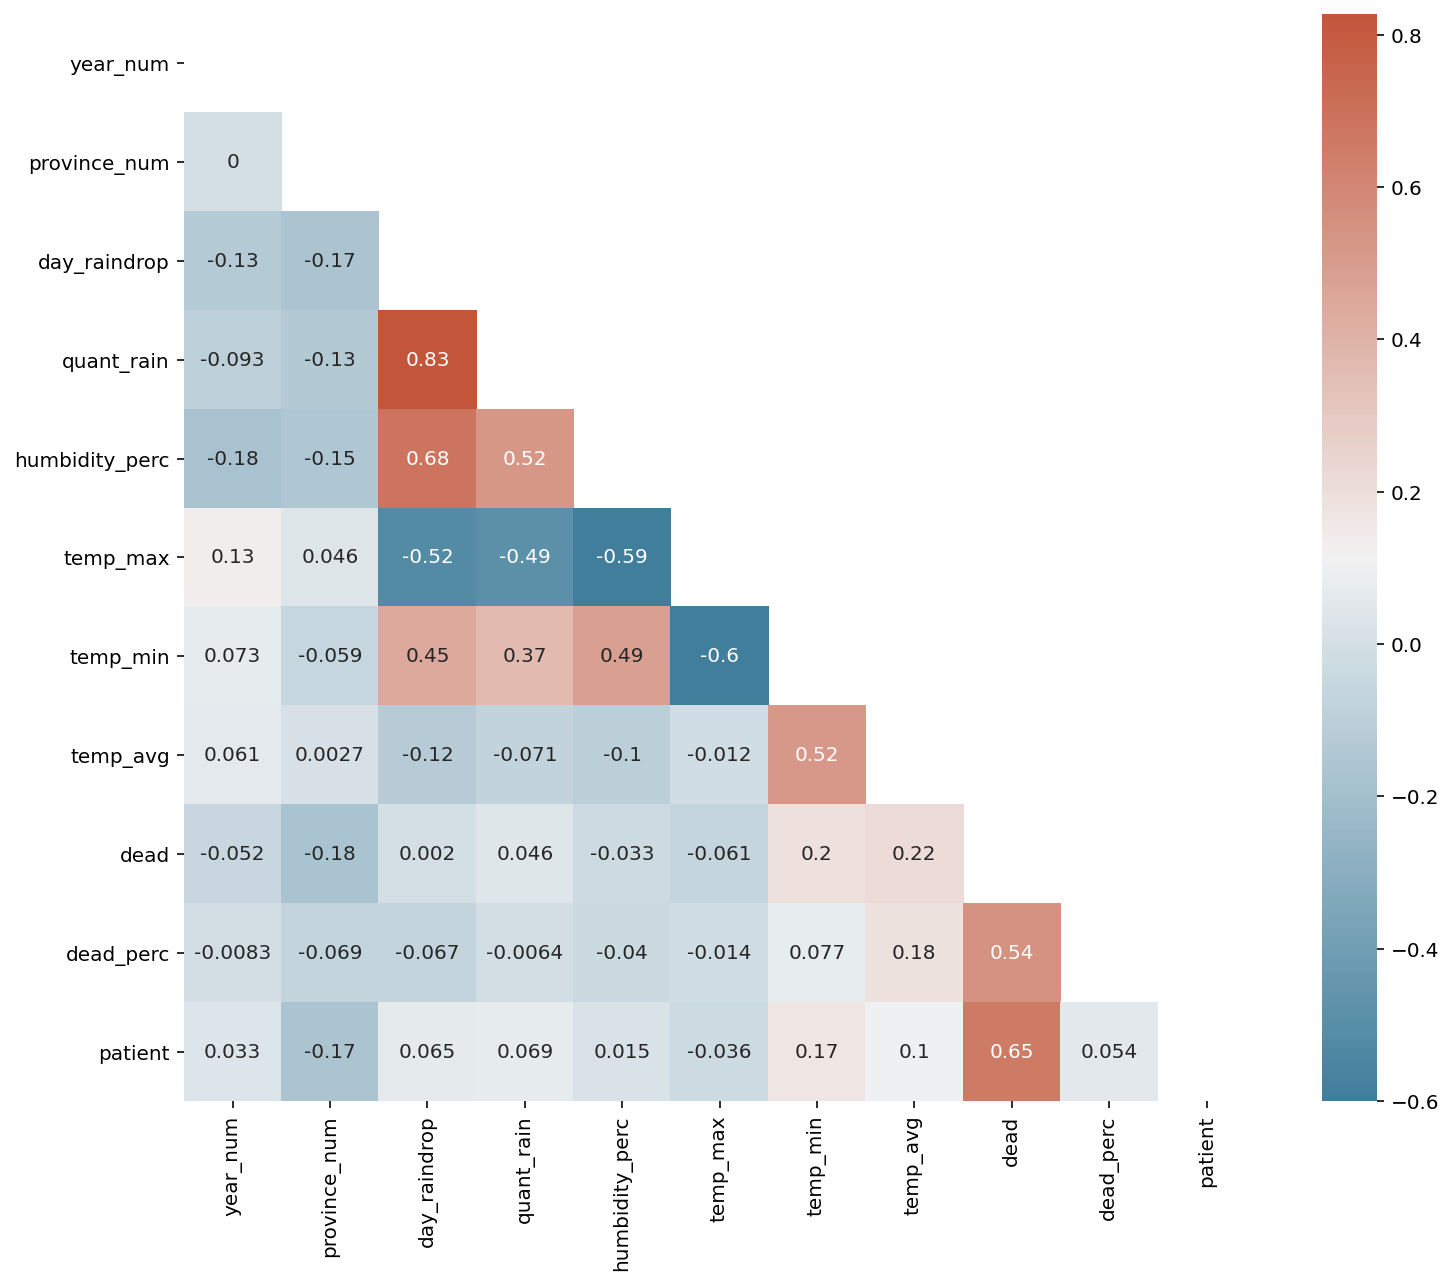

In [19]:
## Correlation between different variables

corr = df_pre.corr()

## Set up the matplotlib plot configuration

f, ax = plt.subplots(figsize=(12, 10))

## Generate a mask for upper traingle

mask = np.triu(np.ones_like(corr, dtype=bool))

## Configure a custom diverging colormap

cmap = sns.diverging_palette(230, 20, as_cmap=True)

## Draw the heatmap

sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
plt.show()

# Building Linear Regression Model

1. Features selection for Linear Regression Model
2. Train Test Split
3. Creating and Training the Model
4. Model Evaluation


## Features selection for Regression Model

In [20]:
df_pre.columns

Index(['year_num', 'province_num', 'day_raindrop', 'quant_rain',
       'humbidity_perc', 'temp_max', 'temp_min', 'temp_avg', 'dead',
       'dead_perc', 'patient'],
      dtype='object')

In [21]:
X = df_pre[['year_num', 'province_num', 'day_raindrop', 'quant_rain', 'humbidity_perc','temp_max', 'temp_min', 'temp_avg', 'dead', 'dead_perc'
       ]]
y = df_pre['patient']

## Train Test Split

This step we will separate data to train (training set) and การ test (testing set)
* training set use for train model 
* testing set use for  test model or call that Evaluation 


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# Train dataset 80% and Test dataset 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

## Creating and Training the Model

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
# Try to use simple model: Linear Regression.
lm = LinearRegression()

In [26]:
# fit model to Train and test set.
lm.fit(X_train,y_train)

LinearRegression()

## Model Evaluation

evaluate model by visit coefficients of each item

In [27]:
# print the intercept
print(lm.intercept_)

203.68465139715886


In [28]:
# create Data Frame 
# Data is lm.coef_
# labal is name of X.columns
# Column is'Coefficient'

coeff_df = pd.DataFrame(lm.coef_ , X.columns , columns=['Coefficient'])
coeff_df

,Coefficient
year_num,90.860514
province_num,-2.795311
day_raindrop,-54.160192
quant_rain,-1.708706
humbidity_perc,330.213750
temp_max,703.410850
temp_min,331.767750
temp_avg,-239.596882
dead,9674.352454
dead_perc,-3961.738880


## Predictions from our Model

In [29]:
# Predicting X test
predictions = lm.predict(X_test)

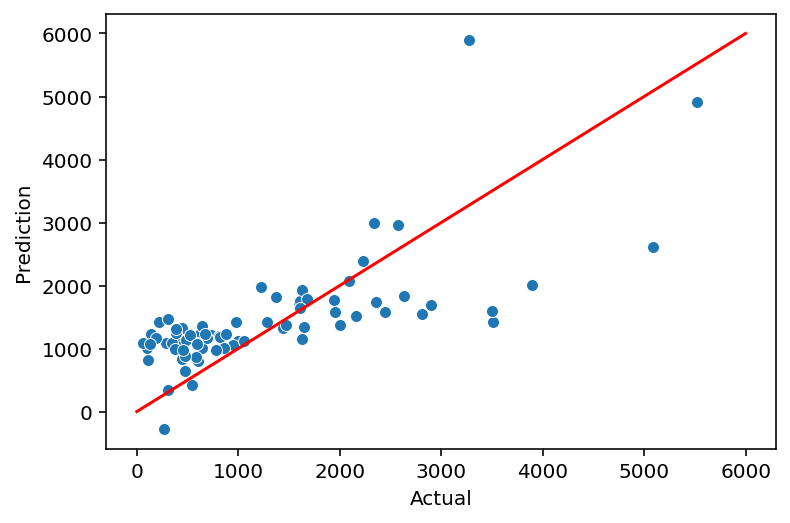

In [30]:
# plot predictions against actual

plot_k = sns.scatterplot(y_test,predictions)
plot_k.set(xlabel='Actual', ylabel='Prediction')

# generate and graph y = x line

x_plot = np.linspace(0,6000,10000)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')
plt.show()

# Simulate linear line

## Prediction

Actual Patient 1604.0
Predicted Patient 1748.66183845761


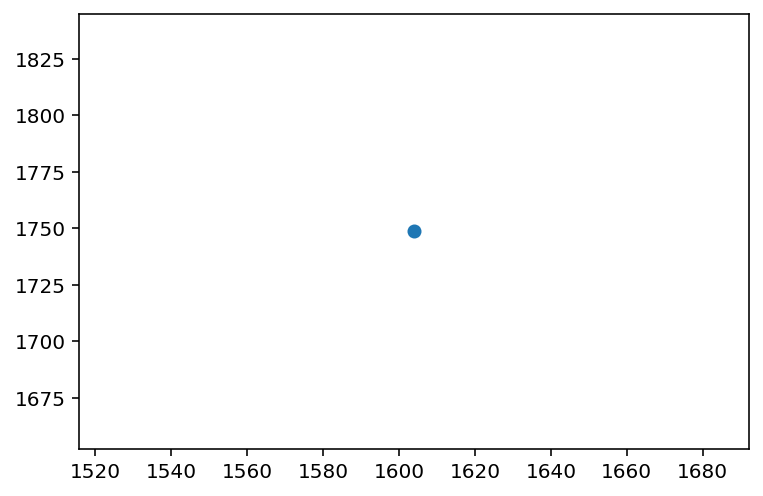

In [31]:
# Choose one of sample to predict and see result

# input : X_test.loc[[random sample for prediction test]]
    
y_pred = lm.predict(X_test.loc[[311]])

plt.scatter(y_test.loc[[311]],  y_pred)
print( "Actual Patient",float(y_test.loc[[311]] ) )
print( "Predicted Patient", float( y_pred))

**Residual Histogram**

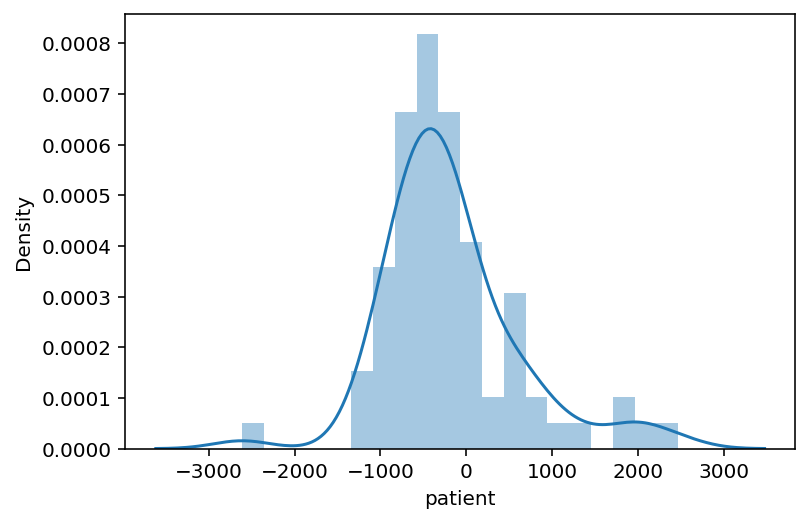

In [32]:
sns.distplot((y_test-predictions),bins=20);

### Actual value and the predicted value

In [33]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': predictions})
mlr_diff.head(10)

,Actual value,Predicted value
9,601,807.375527
172,1950,1572.712162
281,1598,1724.542603
309,3276,5889.125610
311,1604,1748.661838
56,2160,1519.857689
13,5089,2617.575690
384,2092,2079.698403
254,1228,1978.666636
368,135,1227.410436


In [34]:
mlr_diff.describe()

,Actual value,Predicted value
count,77.000000,77.000000
mean,1265.129870,1441.624573
std,1144.250138,830.230958
min,62.000000,-273.833800
25%,443.000000,1074.194026
50%,817.000000,1227.410436
75%,1673.000000,1600.261677
max,5523.000000,5889.125610


## Regression Evaluation Metrics


Evaluation metrics for regression problems as below:

**Coefficient of determination(R2 score)** is used to evaluate the performance of a linear regression model. 
It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s). It is used to check how well-observed results are reproduced by the model, depending on the ratio of total deviation of results described by the model.

$$R2= 1- SSres  /  SStot$$

**Mean Absolute Error** (MAE): the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE): the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE): the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Comparison:**

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.


In [35]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

print('R squared of Training Set: {:.2f}'.format(lm.score(X_train,y_train)))
print('R squared of Testing Set: {:.2f}'.format(lm.score(X_test,y_test)))
print('Mean Absolute Error (MAE): {:.4f}'.format(metrics.mean_absolute_error(y_test, predictions)))
print('Root Mean Squared Error (RMSE): {:.4f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

R squared of Training Set: 0.57
R squared of Testing Set: 0.49
Mean Absolute Error (MAE): 621.9943
Root Mean Squared Error (RMSE): 812.8884


### Record

In [36]:
# Test1   30/9/2564 16:15  test_size=0.20, random_state=60

# Normal linear regression

# R squared of Training Set: 39.58
# Mean Absolute Error (MAE): 0.6420
# Mean Squared Error (MSE): 0.6596
# Root Mean Squared Error (RMSE): 0.8122
#  

In [37]:
# Test2  01/10/2021 13.45

# Test "Recursive Feature Elimination: RFE" result still need all features to use

##----Result of testing----##

# 1 = 0.2126
# 2 = 0.2643
# 3 = 0.2476
# 4 = 0.2953
# 5 = 0.2999
# 6 = 0.2816
# 7 = 0.2851
# 8 = 0.2899
# 9 = 0.2897
# 10 = 0.2706

# Result generated highest score at 0.2431 in 7 Features
#[('year', False, 4),
 #('province_num', False, 6),
 #('day_raindrop', False, 2),
 #('quant_rain', False, 3),
 #('humbidity_perc', False, 5),
 #('temp_max', True, 1),
 #('temp_min', True, 1),
 #('temp_avg', True, 1),
 #('dead', True, 1),
 #('dead_perc', True, 1)]

# after remove 5 feature we got the result as below
# R squared of Training Set: 35.61
# Mean Absolute Error (MAE): 0.6306
# Mean Squared Error (MSE): 0.6330
# Root Mean Squared Error (RMSE): 0.7956

# next Plan
# 1. Hyperparameter Tuning Using Grid Search Cross-Validation
# 2. Search more sample data


In [38]:
# Test3  04/10/2021 16.00

###==Hyperparameter Tuning Using Grid Search Cross-Validation==###
# n_splits = 5, shuffle = True, random_state = 60


# R squared of Training Set: 38.71
# Mean Absolute Error (MAE): 0.6383
# Mean Squared Error (MSE): 0.6422
# Root Mean Squared Error (RMSE): 0.8014

# next Plan
# 1. Search more sample data

In [39]:
# Test4 11/10/2021 10:00

# Plan changed
# 1. take more R2 ,try more than 60

In [40]:
# Test5 12/10/2021 20:30
# Recheck before create report

# REF
##----Result of training----##
# 1 = 0.3624
# 2 = 0.5066
# 3 = 0.5078
# 4 = 0.5103
# 5 = 0.5127
# 6 = 0.5138
# 7 = 0.5138
# 8 = 0.5140
# 9 = 0.5242
# 10 = 0.5246

##----Result of testing----##
# 1 = 0.5754
# 2 = 0.6540
# 3 = 0.6500
# 4 = 0.6537
# 5 = 0.6576 ***
# 6 = 0.6539
# 7 = 0.6529
# 8 = 0.6518
# 9 = 0.6401
# 10 = 0.6425

# Result generated highest score at 0.6576 in 5 Features
#[('year', False, 4),
 #('province_num', False, 6),
 #('day_raindrop', False, 2),
 #('quant_rain', False, 3),
 #('humbidity_perc', False, 5),
 #('temp_max', True, 1),
 #('temp_min', True, 1),
 #('temp_avg', True, 1),
 #('dead', True, 1),
 #('dead_perc', True, 1)]
    
# Result shown that they need more data and more sample size.

In [41]:
# Test6 13/10/2021 09:30
# Reporting

In [42]:
# Create Model Evaluate Report @ 19/10/2021

In [43]:
# Rechecked Model and fix report @ 21/10/2021